🗂️ Found 12 pre-disaster images.
🗂️ Found 12 post-disaster images.
🔷 Processing pre-disaster images...


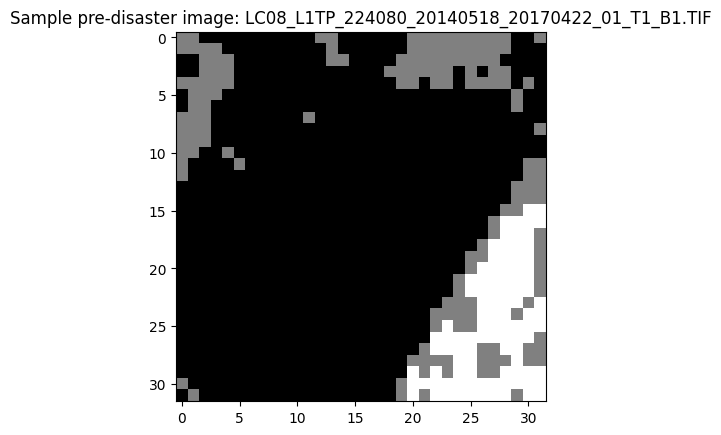

🔷 Processing post-disaster images...


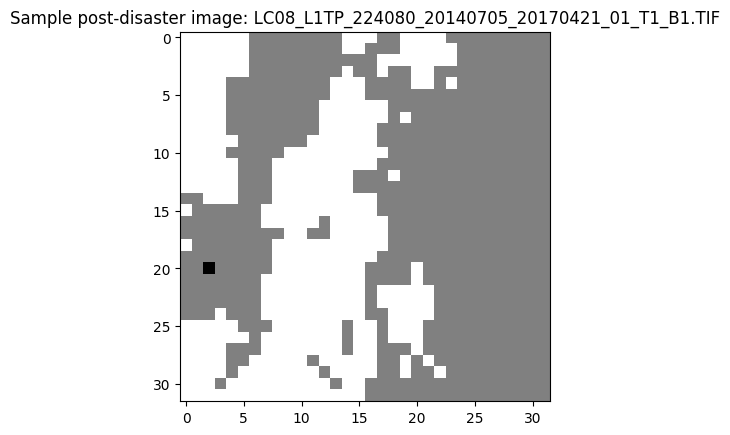

✅ Features shape: (1024, 24) (should be 1024 x 24)
✅ Labels shape: (1, 24)
Labels: [[1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2]]
💾 Saved dataset to `disaster_change_cropped.mat`.


In [1]:
# 📄 Cell 1: Imports
import cv2
import numpy as np
import scipy.io as sio
import os
from IPython.display import display
import matplotlib.pyplot as plt

# 📄 Cell 2: Settings
pre_dir = "./data/Pre_disaster/"
post_dir = "./data/Post_disaster/"

expected_samples = 12
crop_size = 32
output_mat = "disaster_change_cropped.mat"

# 📄 Cell 3: List Files
pre_files = sorted(os.listdir(pre_dir))[:expected_samples]
post_files = sorted(os.listdir(post_dir))[:expected_samples]

print(f"🗂️ Found {len(pre_files)} pre-disaster images.")
print(f"🗂️ Found {len(post_files)} post-disaster images.")

assert len(pre_files) == expected_samples, f"Expected {expected_samples} pre-disaster images!"
assert len(post_files) == expected_samples, f"Expected {expected_samples} post-disaster images!"

# 📄 Cell 4: Process Images with Center Crop
features = []
labels = []

def center_crop(img, size):
    h, w = img.shape
    start_x = (w - size) // 2
    start_y = (h - size) // 2
    return img[start_y:start_y+size, start_x:start_x+size]

def process_image(path):
    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        raise ValueError(f"Failed to load image: {path}")
    h, w = img.shape
    if h < crop_size or w < crop_size:
        raise ValueError(f"Image too small for crop: {path} ({h}x{w})")
    img_cropped = center_crop(img, crop_size)
    return img_cropped.flatten(), img_cropped

print("🔷 Processing pre-disaster images...")
for idx, file in enumerate(pre_files):
    vec, img_dbg = process_image(os.path.join(pre_dir, file))
    features.append(vec)
    labels.append(1)  # class 1: pre-disaster
    if idx == 0:
        plt.imshow(img_dbg, cmap='gray')
        plt.title(f"Sample pre-disaster image: {file}")
        plt.show()

print("🔷 Processing post-disaster images...")
for idx, file in enumerate(post_files):
    vec, img_dbg = process_image(os.path.join(post_dir, file))
    features.append(vec)
    labels.append(2)  # class 2: post-disaster
    if idx == 0:
        plt.imshow(img_dbg, cmap='gray')
        plt.title(f"Sample post-disaster image: {file}")
        plt.show()

# 📄 Cell 5: Prepare Features and Labels
features = np.array(features).T
labels = np.array(labels).reshape(1, -1)

print(f"✅ Features shape: {features.shape} (should be 1024 x {expected_samples*2})")
print(f"✅ Labels shape: {labels.shape}")
print(f"Labels: {labels}")

# 📄 Cell 6: Save `.mat` File
sio.savemat(output_mat, {
    "features": features,
    "Label": labels
})

print(f"💾 Saved dataset to `{output_mat}`.")
